In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Loading the Data

In [91]:
# Read column names from file
#cols = list(pd.read_csv("WineQT.csv", nrows=1))
# Use list comprehension to remove the unwanted column in **usecol**
#wine_data=pd.read_csv('WineQT.csv', usecols =[i for i in cols if i != "Id"])
car_data=pd.read_csv('car data.csv')

In [92]:
car_data.shape

(301, 9)

In [93]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [94]:
#check missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [95]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())
print(car_data['Owner'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


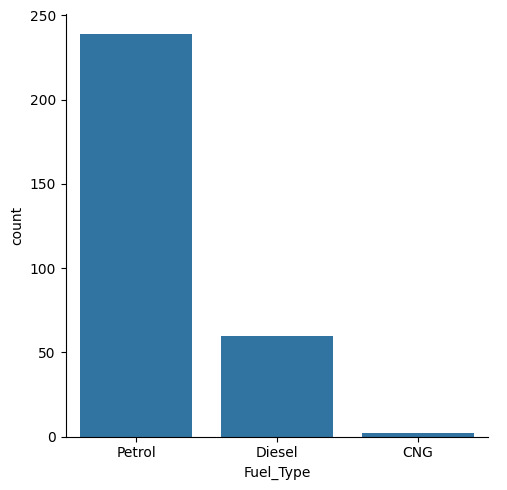

In [96]:
sns.catplot(x='Fuel_Type', data = car_data, kind='count')

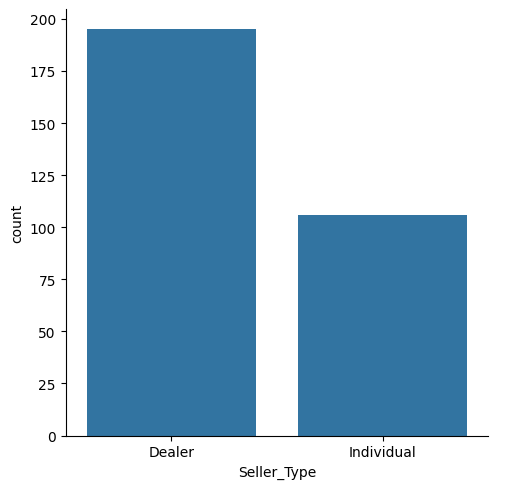

In [97]:
sns.catplot(x='Seller_Type', data = car_data, kind='count')

# Encoding the categorical Data


In [98]:
#Encoding fueltype column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
#Encoding seller_type column
car_data.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
#Encoding transmission column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1 }},inplace=True)
#Encoding owner column
car_data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


# Understanding the correlation between the various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [99]:
#correlation= boston_house.corr()
correlation= car_data.corr()


<ipython-input-99-cd2f5fd2e219>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= car_data.corr()


<Axes: >

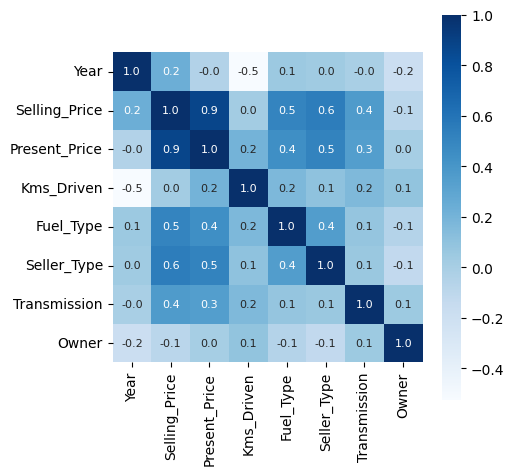

In [100]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=  True , fmt='.1f', annot=True, annot_kws={'size':8} ,cmap='Blues' )

# Splitting the data (features) and Target (label)

In [101]:
#X= boston_house.drop(['Price'],axis=1)
#Y=boston_house['Price']
X= car_data.drop(['Selling_Price','Car_Name'],axis=1)
Y= car_data['Selling_Price']

# Splitting the data in Train and Test Data

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


# Model Training

 Linear Regression

In [103]:
#loading the linear regression model
lin_reg_model= LinearRegression()
lin_reg_model.fit(X_train, Y_train)



LinearRegression()

In [104]:
# Accuracy on prediction on train data
lin_reg_train_data_pred= lin_reg_model.predict(X_train)
# Accuracy on prediction on test data
lin_reg_test_data_pred= lin_reg_model.predict(X_test)

In [105]:
# R-squared error
lin_reg_train_score_1 = metrics.r2_score(Y_train,lin_reg_train_data_pred)
# Mean absolute error
lin_reg_train_score_2 = metrics.mean_absolute_error(Y_train,lin_reg_train_data_pred)
# R-squared error
lin_reg_test_score_1 = metrics.r2_score(Y_test,lin_reg_test_data_pred)
# Mean absolute error
lin_reg_test_score_2 = metrics.mean_absolute_error(Y_test,lin_reg_test_data_pred)

In [114]:
print(lin_reg_train_score_1,lin_reg_train_score_2,lin_reg_test_score_1,lin_reg_test_score_2)

print("The r2 score accuracy on Train Data is {}%".format(round(lin_reg_train_score_1, 2) *100))
print("The r2 score accuracy on Test Data is {}%".format(round(lin_reg_test_score_1, 2) *100))
score1 = lin_reg_train_score_2
score2 = lin_reg_test_score_2
print("The Mean Absolute Error on Train Data is {}".format(round(score1, 2)))
print("The Mean Absolute Error on Test Data is {}".format(round(score2, 2)))

score1 = np.sqrt(lin_reg_train_score_2)
score2 = np.sqrt(lin_reg_test_score_2)
print("The Root Mean Squared Error on Train Data is {}".format(round(score1, 2)))
print("The Root Mean Squared Error on Test Data is {}".format(round(score2, 2)))

0.8799451660493711 1.2166174093911273 0.8365766715027051 1.1516382156613783
The r2 score accuracy on Train Data is 88.0%
The r2 score accuracy on Test Data is 84.0%
The Mean Absolute Error on Train Data is 1.22
The Mean Absolute Error on Test Data is 1.15
The Root Mean Squared Error on Train Data is 1.1
The Root Mean Squared Error on Test Data is 1.07


# Visualizing the actual and Predicted Prices for Linear Regression

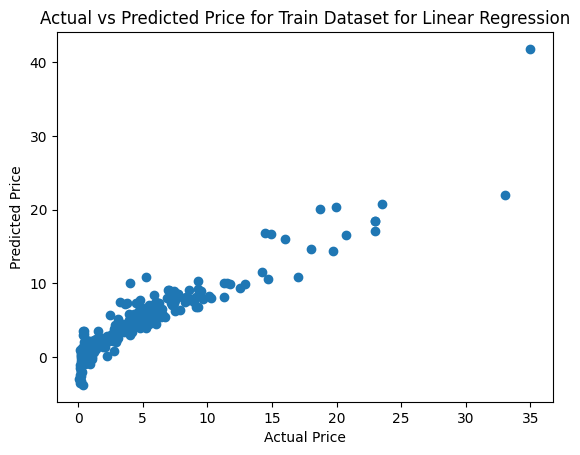

In [117]:
plt.scatter(Y_train, lin_reg_train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Train Dataset for Linear Regression")
plt.show()

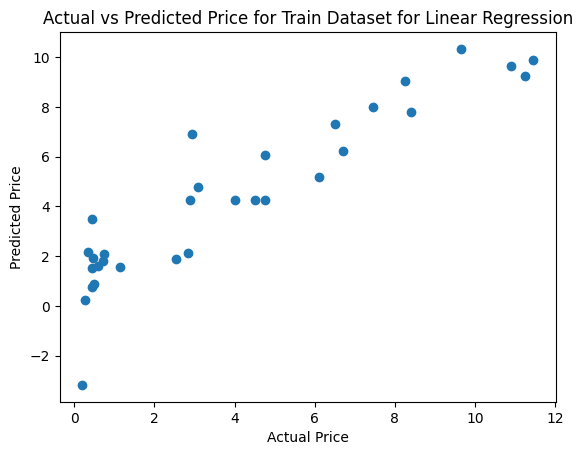

In [116]:
plt.scatter(Y_test, lin_reg_test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Train Dataset for Linear Regression")
plt.show()

# Model Training

Lasso Regression

In [107]:
#loading the model
lasso_reg_model= Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [108]:
# Accuracy on prediction on train data
lasso_train_data_pred= lasso_reg_model.predict(X_train)
# Accuracy on prediction on test data
lasso_test_data_pred= lasso_reg_model.predict(X_test)

In [109]:
# R-squared error
lasso_train_score_1 = metrics.r2_score(Y_train,lasso_train_data_pred)
# Mean absolute error
lasso_train_score_2 = metrics.mean_absolute_error(Y_train,lasso_train_data_pred)
# R-squared error
lasso_test_score_1 = metrics.r2_score(Y_test,lasso_test_data_pred)
# Mean absolute error
lasso_test_score_2 = metrics.mean_absolute_error(Y_test,lasso_test_data_pred)

In [111]:
print(lasso_train_score_1,lasso_train_score_2,lasso_test_score_1,lasso_test_score_2)

print("The r2 score accuracy on Train Data is {}%".format(round(lasso_train_score_1, 2) *100))
print("The r2 score accuracy on Test Data is {}%".format(round(lasso_test_score_1, 2) *100))
score1 = lasso_train_score_2
score2 = lasso_test_score_2
print("The Mean Absolute Error on Train Data is {}".format(round(score1, 2)))
print("The Mean Absolute Error on Test Data is {}".format(round(score2, 2)))

score1 = np.sqrt(lasso_train_score_2)
score2 = np.sqrt(lasso_test_score_2)
print("The Root Mean Squared Error on Train Data is {}".format(round(score1, 2)))
print("The Root Mean Squared Error on Test Data is {}".format(round(score2, 2)))

0.8427856123435794 1.2863097696916528 0.8709167941173195 1.0507413774170433
The r2 score accuracy on Train Data is 84.0%
The r2 score accuracy on Test Data is 87.0%
The Mean Absolute Error on Train Data is 1.29
The Mean Absolute Error on Test Data is 1.05
The Root Mean Squared Error on Train Data is 1.13
The Root Mean Squared Error on Test Data is 1.03


# Visualizing the actual and Predicted Prices for Lasso Regression

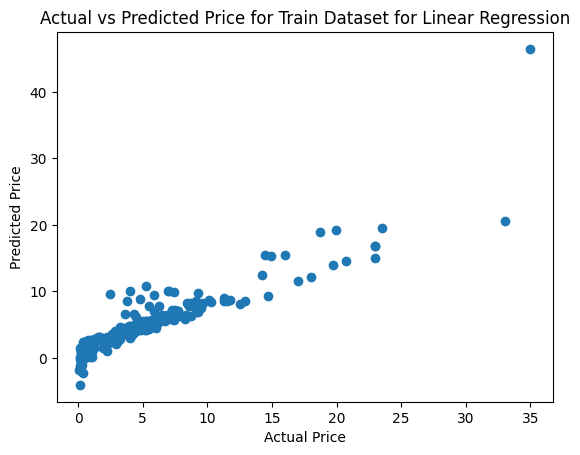

In [112]:
plt.scatter(Y_train, lasso_train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Train Dataset for Lasso Regression")
plt.show()

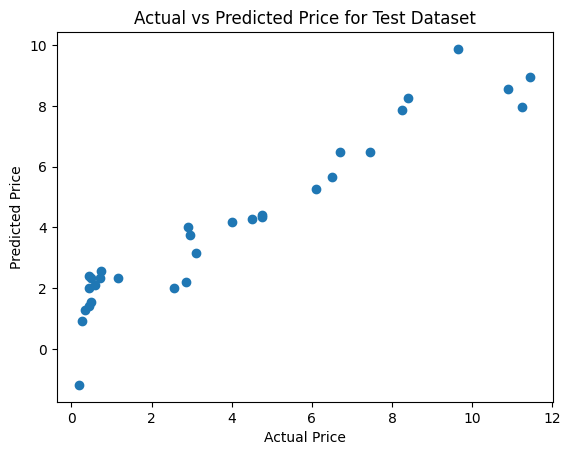

In [113]:
plt.scatter(Y_test, lasso_test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price for Test Dataset")
plt.show()